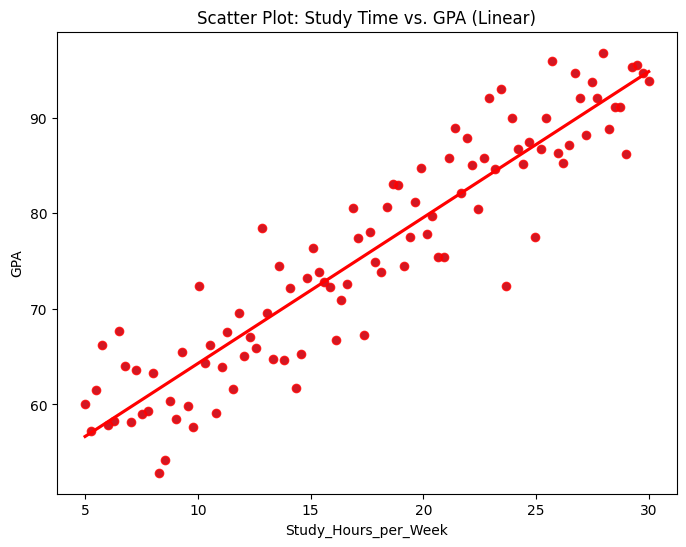

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate synthetic data with a strong linear relationship
np.random.seed(42)  # For reproducibility
num_samples = 100


study_hours = np.linspace(5, 30, num_samples)  # Evenly spaced study hours
noise = np.random.normal(0, 5, num_samples)  # Add some random noise
gpa = 50 + 1.5 * study_hours + noise  # Linear relationship with noise


df = pd.DataFrame({'Study_Hours_per_Week': study_hours, 'GPA': gpa})


# 1. Scatter Plot: Study Time vs. GPA (Linear)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Study_Hours_per_Week', y='GPA', data=df)
plt.title('Scatter Plot: Study Time vs. GPA (Linear)')
plt.xlabel('Study Hours per Week')
plt.ylabel('GPA')


# Add a linear regression line to visualize the trend
sns.regplot(x='Study_Hours_per_Week', y='GPA', data=df, ci=None, color='red') #ci=None removes confidence interval
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
# Load the dataset
df = pd.read_csv('Students_Grading_Dataset.csv')


# Selecting predictor variables and the response variable
X = df[['Study_Hours_per_Week', 'Attendance (%)', 'Sleep_Hours_per_Night', 'Extracurricular_Activities']]
y = df['Grade']
X = pd.get_dummies(X, columns=['Extracurricular_Activities'], drop_first=True) # drop_first to avoid multicollinearity


# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X = imputer.fit_transform(X)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Displaying results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.5468971712647734
R-squared: 0.3079069521431823
